### Hologram Mask Code 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn
from scipy.constants import pi


In [8]:
def mask (x,y,A,phi,dif_r,dif_ang):
    v = dif_r*np.cos(dif_ang*180/np.pi) #Coordenadas polares 
    n = dif_r*np.sin(dif_ang*180/np.pi) #180/pi es para tener radianes 
    q=np.arcsin(A/A.max())/np.pi
    p=phi+np.pi*2*(v*x+n*y)
    return 0.5+0.5*np.sign(np.cos(p)+np.cos(np.pi*q))
def intensity(mode):
    return np.abs(mode)
def phase(mode):
    return np.angle(mode)
def mode_BG(r,kr,theta, w0,l):
    rho = r / w0
    gauss =np.exp(-rho**2)
    OAM =np.exp(1j*theta*l)
    J = np.sqrt(2/np.pi)*jn(l, kr*r) *gauss*OAM
    return J

In [9]:
px_x = 1280  # Resolución horizontal de la imagen 
px_y = 720   # Resolución vertical de la imagen
px_size =5.4e-6 #Tamaño de pixel
x_m = px_x*px_size
y_m = px_y *px_size
x = np.linspace(-x_m/2, x_m/2,px_x)
y = np.linspace(-y_m/2, y_m/2,px_y)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)

In [10]:
#Parámetros 
kr = 10e3 #Radial wave number 
w0 = .5e-3 #Beam Waist
l = 5  # Bessel order 
field =mode_BG(R,kr,Theta,w0,l)
A = intensity(field)
phi = phase(field)
image_path = './mask_2/'  # Ruta donde se guardará la imagen

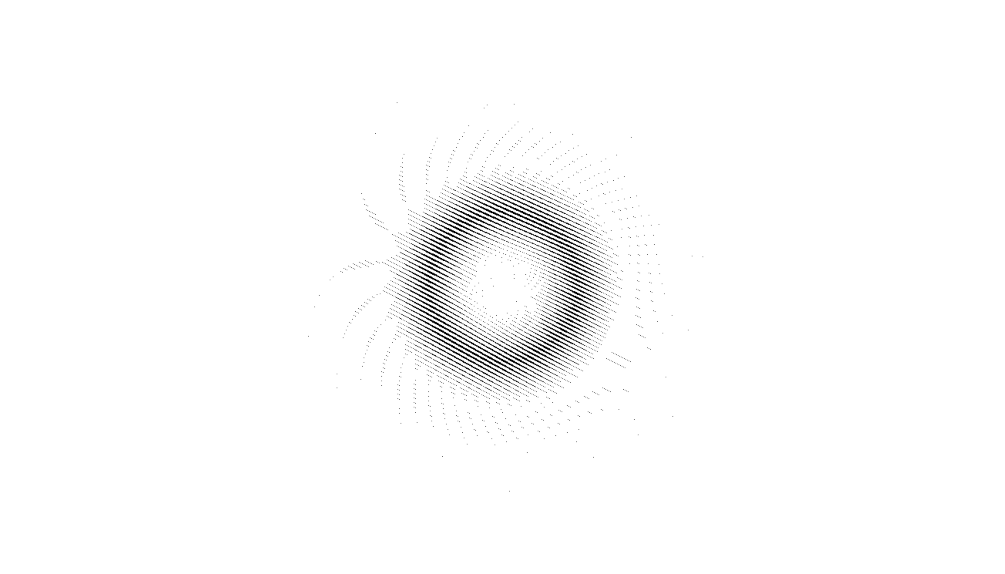

In [11]:
hol = mask(X,Y,A,phi,dif_r=35000,dif_ang=70)
plt.gca().imshow(hol,cmap = "Greys_r")
plt.axis('off')
plt.gcf().set_size_inches(px_x/100,px_y/100)
plt.gcf().savefig(image_path+'mask.png', dpi = 100)